In [1]:
#### importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###loading the data set
df=pd.read_csv(r"C:\Users\AwesomeAkbar\Desktop\data.csv")

In [3]:
### checking first five dataset
df.head() 

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [5]:
df.isnull().sum()   #### checking all the null values

x1    5
x2    3
y     0
dtype: int64

In [6]:
df.dropna(inplace=True)  ### dropping all the null values

In [7]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [8]:
df.shape

(2219, 3)

In [9]:
df.head(10)

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
5,-121.393638,120.037573,1
6,-102.569918,113.840641,1
7,-118.175619,110.460679,1
8,-118.366669,115.000000,1
9,-102.731143,122.923042,1


In [10]:
### no of value counts of zero and one
df["y"].value_counts()   


0    1238
1     981
Name: y, dtype: int64

# visualisation through box plot and countplot

c:\users\awesomeakbar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'counts')

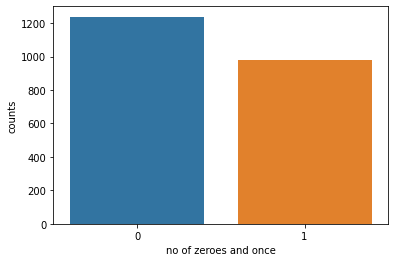

In [11]:
### creating a countplot

sns.countplot(df.y)
plt.xlabel("no of zeroes and once")
plt.ylabel("counts")

<AxesSubplot:xlabel='x2'>

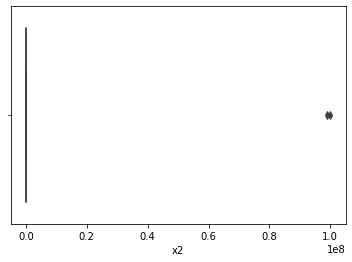

In [12]:
### to check the presence of outlier through box plot

sns.boxplot(x=df["x2"])

In [13]:
#### from the above figure outliers values range from 1 , so these are the outliers

<AxesSubplot:>

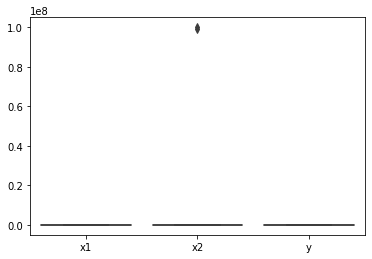

In [14]:
sns.boxplot(data=df)

In [15]:
import numpy as np
from scipy import stats

# outlier treatment

In [16]:
df.x2.mean()   #### finding the mean of x2

89677.81673315333

In [17]:
df.x2.std()    #### finding the standard deviation of x2

2986680.2348425137

In [18]:
upper_limit=df.x2.mean()+3*df.x2.std()
lower_limit=df.x2.mean()-3*df.x2.std()

In [19]:
upper_limit,lower_limit

(9049718.521260696, -8870362.887794388)

In [20]:
df[(df.x2>upper_limit)|(df.x2<lower_limit)]

,x1,x2,y
1541,66.633331,99009998.0,0
2226,109.624009,99999999.0,0


In [21]:
df.drop([1541,2226],inplace=True)

In [22]:
df.shape

(2217, 3)

<AxesSubplot:xlabel='x2'>

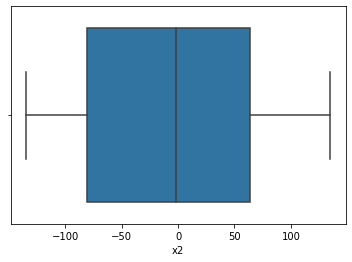

In [23]:
### no outlier is present now
sns.boxplot(x=df["x2"])   

In [24]:
#### hence the outlier is removed

In [25]:
df.shape

(2217, 3)

In [26]:
X=df.iloc[:,0:2]

In [27]:
y=df.iloc[:,-1]

In [28]:
### NOW its time to split our dataset in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
y_train.shape,y_test.shape

((1773,), (444,))

In [30]:
###1) KNN
### KNN model
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("KNN accuracy:{: .2f}%".format(knn.score(X_test,y_test)*100))

KNN accuracy: 95.50%


In [31]:
### 2) logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log=LogisticRegression()

In [34]:
log.fit(X_train,y_train)

LogisticRegression()

In [35]:
log.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [36]:
log.score(X_test,y_test)

0.7657657657657657